In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import datetime

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

!pip install openpyxl
    
import pandas as pd 
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
import pickle

In [2]:
train_df=pd.read_excel('Data_Train.xlsx')
test_df=pd.read_excel('Test_set.xlsx')

In [3]:
print("train data shape:",train_df.shape)
print("test data shape:",test_df.shape)

train data shape: (10683, 11)
test data shape: (2671, 10)


In [4]:
train_df

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302
...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107
10679,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648


In [5]:
test_df

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info
...,...,...,...,...,...,...,...,...,...,...
2666,Air India,6/06/2019,Kolkata,Banglore,CCU → DEL → BLR,20:30,20:25 07 Jun,23h 55m,1 stop,No info
2667,IndiGo,27/03/2019,Kolkata,Banglore,CCU → BLR,14:20,16:55,2h 35m,non-stop,No info
2668,Jet Airways,6/03/2019,Delhi,Cochin,DEL → BOM → COK,21:50,04:25 07 Mar,6h 35m,1 stop,No info
2669,Air India,6/03/2019,Delhi,Cochin,DEL → BOM → COK,04:00,19:15,15h 15m,1 stop,No info


In [6]:
train_df.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [7]:
train_df.dropna(axis=0,inplace=True)

In [8]:
train_df.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

In [9]:
test_df.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
dtype: int64

In [10]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10682 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10682 non-null  object
 1   Date_of_Journey  10682 non-null  object
 2   Source           10682 non-null  object
 3   Destination      10682 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10682 non-null  object
 6   Arrival_Time     10682 non-null  object
 7   Duration         10682 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10682 non-null  object
 10  Price            10682 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 1001.4+ KB


In [11]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2671 entries, 0 to 2670
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          2671 non-null   object
 1   Date_of_Journey  2671 non-null   object
 2   Source           2671 non-null   object
 3   Destination      2671 non-null   object
 4   Route            2671 non-null   object
 5   Dep_Time         2671 non-null   object
 6   Arrival_Time     2671 non-null   object
 7   Duration         2671 non-null   object
 8   Total_Stops      2671 non-null   object
 9   Additional_Info  2671 non-null   object
dtypes: object(10)
memory usage: 208.8+ KB


In [12]:
train_df.describe()

,Price
count,10682.000000
mean,9087.214567
std,4611.548810
min,1759.000000
25%,5277.000000
50%,8372.000000
75%,12373.000000
max,79512.000000


In [13]:
train_df

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302
...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107
10679,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648


# Data Preprocessing

In [14]:
#Checking Additional info
train_df['Additional_Info'].value_counts()

No info                         8344
In-flight meal not included     1982
No check-in baggage included     320
1 Long layover                    19
Change airports                    7
Business class                     4
No Info                            3
1 Short layover                    1
Red-eye flight                     1
2 Long layover                     1
Name: Additional_Info, dtype: int64

In [15]:
## As we can see there are many  rows with no info. So, we can drop that column
train_df.drop('Additional_Info',axis=1,inplace=True)

In [16]:
#As we can see Route column is same as number of stops . so we can drop Route column.
train_df.drop('Route',axis=1,inplace=True)

In [17]:
train_df

,Airline,Date_of_Journey,Source,Destination,Dep_Time,Arrival_Time,Duration,Total_Stops,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,22:20,01:10 22 Mar,2h 50m,non-stop,3897
1,Air India,1/05/2019,Kolkata,Banglore,05:50,13:15,7h 25m,2 stops,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,09:25,04:25 10 Jun,19h,2 stops,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,18:05,23:30,5h 25m,1 stop,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,16:50,21:35,4h 45m,1 stop,13302
...,...,...,...,...,...,...,...,...,...
10678,Air Asia,9/04/2019,Kolkata,Banglore,19:55,22:25,2h 30m,non-stop,4107
10679,Air India,27/04/2019,Kolkata,Banglore,20:45,23:20,2h 35m,non-stop,4145
10680,Jet Airways,27/04/2019,Banglore,Delhi,08:20,11:20,3h,non-stop,7229
10681,Vistara,01/03/2019,Banglore,New Delhi,11:30,14:10,2h 40m,non-stop,12648


In [18]:
#Year,month,date and day should be extracted seperately from Date_of_journey.
train_df['Journey_day']=pd.to_datetime(train_df.Date_of_Journey,format="%d/%m/%Y").dt.day
train_df['Journey_month']=pd.to_datetime(train_df.Date_of_Journey,format="%d/%m/%Y").dt.month
train_df['Journey_year']=pd.to_datetime(train_df.Date_of_Journey,format="%d/%m/%Y").dt.year
train_df['Journey_weekday']=pd.to_datetime(train_df.Date_of_Journey,format="%d/%m/%Y").dt.weekday

In [19]:
train_df

,Airline,Date_of_Journey,Source,Destination,Dep_Time,Arrival_Time,Duration,Total_Stops,Price,Journey_day,Journey_month,Journey_year,Journey_weekday
0,IndiGo,24/03/2019,Banglore,New Delhi,22:20,01:10 22 Mar,2h 50m,non-stop,3897,24,3,2019,6
1,Air India,1/05/2019,Kolkata,Banglore,05:50,13:15,7h 25m,2 stops,7662,1,5,2019,2
2,Jet Airways,9/06/2019,Delhi,Cochin,09:25,04:25 10 Jun,19h,2 stops,13882,9,6,2019,6
3,IndiGo,12/05/2019,Kolkata,Banglore,18:05,23:30,5h 25m,1 stop,6218,12,5,2019,6
4,IndiGo,01/03/2019,Banglore,New Delhi,16:50,21:35,4h 45m,1 stop,13302,1,3,2019,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,9/04/2019,Kolkata,Banglore,19:55,22:25,2h 30m,non-stop,4107,9,4,2019,1
10679,Air India,27/04/2019,Kolkata,Banglore,20:45,23:20,2h 35m,non-stop,4145,27,4,2019,5
10680,Jet Airways,27/04/2019,Banglore,Delhi,08:20,11:20,3h,non-stop,7229,27,4,2019,5
10681,Vistara,01/03/2019,Banglore,New Delhi,11:30,14:10,2h 40m,non-stop,12648,1,3,2019,4


In [20]:
#As we have extracted date and day ,Now we can drop the column Date_of_Journey.
train_df.drop('Date_of_Journey',axis=1,inplace=True)

In [21]:
train_df

,Airline,Source,Destination,Dep_Time,Arrival_Time,Duration,Total_Stops,Price,Journey_day,Journey_month,Journey_year,Journey_weekday
0,IndiGo,Banglore,New Delhi,22:20,01:10 22 Mar,2h 50m,non-stop,3897,24,3,2019,6
1,Air India,Kolkata,Banglore,05:50,13:15,7h 25m,2 stops,7662,1,5,2019,2
2,Jet Airways,Delhi,Cochin,09:25,04:25 10 Jun,19h,2 stops,13882,9,6,2019,6
3,IndiGo,Kolkata,Banglore,18:05,23:30,5h 25m,1 stop,6218,12,5,2019,6
4,IndiGo,Banglore,New Delhi,16:50,21:35,4h 45m,1 stop,13302,1,3,2019,4
...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,Kolkata,Banglore,19:55,22:25,2h 30m,non-stop,4107,9,4,2019,1
10679,Air India,Kolkata,Banglore,20:45,23:20,2h 35m,non-stop,4145,27,4,2019,5
10680,Jet Airways,Banglore,Delhi,08:20,11:20,3h,non-stop,7229,27,4,2019,5
10681,Vistara,Banglore,New Delhi,11:30,14:10,2h 40m,non-stop,12648,1,3,2019,4


In [22]:
#Now we need to extract time from Dep_Time and Arrival_Time.

#Departure Time
train_df['Departure_hour']=pd.to_datetime(train_df.Dep_Time).dt.hour
train_df['Departure_minutes']=pd.to_datetime(train_df.Dep_Time).dt.minute

#Arrival Time
train_df['Arrival_hour']=pd.to_datetime(train_df.Arrival_Time).dt.hour
train_df['Arrival_minutes']=pd.to_datetime(train_df.Arrival_Time).dt.minute


In [23]:
train_df

,Airline,Source,Destination,Dep_Time,Arrival_Time,Duration,Total_Stops,Price,Journey_day,Journey_month,Journey_year,Journey_weekday,Departure_hour,Departure_minutes,Arrival_hour,Arrival_minutes
0,IndiGo,Banglore,New Delhi,22:20,01:10 22 Mar,2h 50m,non-stop,3897,24,3,2019,6,22,20,1,10
1,Air India,Kolkata,Banglore,05:50,13:15,7h 25m,2 stops,7662,1,5,2019,2,5,50,13,15
2,Jet Airways,Delhi,Cochin,09:25,04:25 10 Jun,19h,2 stops,13882,9,6,2019,6,9,25,4,25
3,IndiGo,Kolkata,Banglore,18:05,23:30,5h 25m,1 stop,6218,12,5,2019,6,18,5,23,30
4,IndiGo,Banglore,New Delhi,16:50,21:35,4h 45m,1 stop,13302,1,3,2019,4,16,50,21,35
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,Kolkata,Banglore,19:55,22:25,2h 30m,non-stop,4107,9,4,2019,1,19,55,22,25
10679,Air India,Kolkata,Banglore,20:45,23:20,2h 35m,non-stop,4145,27,4,2019,5,20,45,23,20
10680,Jet Airways,Banglore,Delhi,08:20,11:20,3h,non-stop,7229,27,4,2019,5,8,20,11,20
10681,Vistara,Banglore,New Delhi,11:30,14:10,2h 40m,non-stop,12648,1,3,2019,4,11,30,14,10


In [24]:
#Now we can drop departure time and arrival time as we already extracted them.
train_df.drop(['Dep_Time','Arrival_Time'],axis=1,inplace=True)

In [25]:
train_df

,Airline,Source,Destination,Duration,Total_Stops,Price,Journey_day,Journey_month,Journey_year,Journey_weekday,Departure_hour,Departure_minutes,Arrival_hour,Arrival_minutes
0,IndiGo,Banglore,New Delhi,2h 50m,non-stop,3897,24,3,2019,6,22,20,1,10
1,Air India,Kolkata,Banglore,7h 25m,2 stops,7662,1,5,2019,2,5,50,13,15
2,Jet Airways,Delhi,Cochin,19h,2 stops,13882,9,6,2019,6,9,25,4,25
3,IndiGo,Kolkata,Banglore,5h 25m,1 stop,6218,12,5,2019,6,18,5,23,30
4,IndiGo,Banglore,New Delhi,4h 45m,1 stop,13302,1,3,2019,4,16,50,21,35
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,Kolkata,Banglore,2h 30m,non-stop,4107,9,4,2019,1,19,55,22,25
10679,Air India,Kolkata,Banglore,2h 35m,non-stop,4145,27,4,2019,5,20,45,23,20
10680,Jet Airways,Banglore,Delhi,3h,non-stop,7229,27,4,2019,5,8,20,11,20
10681,Vistara,Banglore,New Delhi,2h 40m,non-stop,12648,1,3,2019,4,11,30,14,10


In [26]:
#Checking Total number of stops, so that it can understand easily.
train_df['Total_Stops'].value_counts()

1 stop      5625
non-stop    3491
2 stops     1520
3 stops       45
4 stops        1
Name: Total_Stops, dtype: int64

In [27]:
train_df['Total_Stops']=train_df['Total_Stops'].replace({'non-stop':'0','1 stop':'1','2 stops':'2','3 stops':'3','4 stops':'4'})

In [28]:
train_df

,Airline,Source,Destination,Duration,Total_Stops,Price,Journey_day,Journey_month,Journey_year,Journey_weekday,Departure_hour,Departure_minutes,Arrival_hour,Arrival_minutes
0,IndiGo,Banglore,New Delhi,2h 50m,0,3897,24,3,2019,6,22,20,1,10
1,Air India,Kolkata,Banglore,7h 25m,2,7662,1,5,2019,2,5,50,13,15
2,Jet Airways,Delhi,Cochin,19h,2,13882,9,6,2019,6,9,25,4,25
3,IndiGo,Kolkata,Banglore,5h 25m,1,6218,12,5,2019,6,18,5,23,30
4,IndiGo,Banglore,New Delhi,4h 45m,1,13302,1,3,2019,4,16,50,21,35
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,Kolkata,Banglore,2h 30m,0,4107,9,4,2019,1,19,55,22,25
10679,Air India,Kolkata,Banglore,2h 35m,0,4145,27,4,2019,5,20,45,23,20
10680,Jet Airways,Banglore,Delhi,3h,0,7229,27,4,2019,5,8,20,11,20
10681,Vistara,Banglore,New Delhi,2h 40m,0,12648,1,3,2019,4,11,30,14,10


In [29]:
duration=list(train_df['Duration'])
duration_hour=[]
duration_min=[]
for i in range(len(duration)):
    if len((duration[i].split(' ')))!=2:
        if 'h' in duration[i]:
            duration[i]=duration[i]+' '+'0m'
        else:
            duration[i]='0h'+' '+duration[i]
            
            
            
for i in range(len(duration)):
    duration_hour.append(duration[i].split('h')[0]) 
    duration_min.append(duration[i].split(' ')[1].split('m')[0])

In [30]:
train_df['Duration_hour']=duration_hour
train_df['Duration_minutes']=duration_min

In [31]:
train_df

,Airline,Source,Destination,Duration,Total_Stops,Price,Journey_day,Journey_month,Journey_year,Journey_weekday,Departure_hour,Departure_minutes,Arrival_hour,Arrival_minutes,Duration_hour,Duration_minutes
0,IndiGo,Banglore,New Delhi,2h 50m,0,3897,24,3,2019,6,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,7h 25m,2,7662,1,5,2019,2,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,19h,2,13882,9,6,2019,6,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,5h 25m,1,6218,12,5,2019,6,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,4h 45m,1,13302,1,3,2019,4,16,50,21,35,4,45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,Kolkata,Banglore,2h 30m,0,4107,9,4,2019,1,19,55,22,25,2,30
10679,Air India,Kolkata,Banglore,2h 35m,0,4145,27,4,2019,5,20,45,23,20,2,35
10680,Jet Airways,Banglore,Delhi,3h,0,7229,27,4,2019,5,8,20,11,20,3,0
10681,Vistara,Banglore,New Delhi,2h 40m,0,12648,1,3,2019,4,11,30,14,10,2,40


In [32]:
#As we have extracted duration time, now we can drop duration column
train_df.drop('Duration',axis=1,inplace=True)

In [33]:
train_df

,Airline,Source,Destination,Total_Stops,Price,Journey_day,Journey_month,Journey_year,Journey_weekday,Departure_hour,Departure_minutes,Arrival_hour,Arrival_minutes,Duration_hour,Duration_minutes
0,IndiGo,Banglore,New Delhi,0,3897,24,3,2019,6,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,2,7662,1,5,2019,2,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,2,13882,9,6,2019,6,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,1,6218,12,5,2019,6,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,1,13302,1,3,2019,4,16,50,21,35,4,45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,Kolkata,Banglore,0,4107,9,4,2019,1,19,55,22,25,2,30
10679,Air India,Kolkata,Banglore,0,4145,27,4,2019,5,20,45,23,20,2,35
10680,Jet Airways,Banglore,Delhi,0,7229,27,4,2019,5,8,20,11,20,3,0
10681,Vistara,Banglore,New Delhi,0,12648,1,3,2019,4,11,30,14,10,2,40


In [34]:
train_df['Journey_year'].value_counts()
#As we can see the whole data is from 2019 . So this column  is useless. we can drop this column.
train_df.drop('Journey_year',axis=1,inplace=True)

In [35]:
train_df

,Airline,Source,Destination,Total_Stops,Price,Journey_day,Journey_month,Journey_weekday,Departure_hour,Departure_minutes,Arrival_hour,Arrival_minutes,Duration_hour,Duration_minutes
0,IndiGo,Banglore,New Delhi,0,3897,24,3,6,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,2,7662,1,5,2,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,2,13882,9,6,6,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,1,6218,12,5,6,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,1,13302,1,3,4,16,50,21,35,4,45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,Kolkata,Banglore,0,4107,9,4,1,19,55,22,25,2,30
10679,Air India,Kolkata,Banglore,0,4145,27,4,5,20,45,23,20,2,35
10680,Jet Airways,Banglore,Delhi,0,7229,27,4,5,8,20,11,20,3,0
10681,Vistara,Banglore,New Delhi,0,12648,1,3,4,11,30,14,10,2,40


# Exploratory Data Analysis

In [36]:
train_df

,Airline,Source,Destination,Total_Stops,Price,Journey_day,Journey_month,Journey_weekday,Departure_hour,Departure_minutes,Arrival_hour,Arrival_minutes,Duration_hour,Duration_minutes
0,IndiGo,Banglore,New Delhi,0,3897,24,3,6,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,2,7662,1,5,2,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,2,13882,9,6,6,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,1,6218,12,5,6,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,1,13302,1,3,4,16,50,21,35,4,45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,Kolkata,Banglore,0,4107,9,4,1,19,55,22,25,2,30
10679,Air India,Kolkata,Banglore,0,4145,27,4,5,20,45,23,20,2,35
10680,Jet Airways,Banglore,Delhi,0,7229,27,4,5,8,20,11,20,3,0
10681,Vistara,Banglore,New Delhi,0,12648,1,3,4,11,30,14,10,2,40


In [37]:
train_df['Airline'].value_counts()

Jet Airways                          3849
IndiGo                               2053
Air India                            1751
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 [Text(0, 0, 'IndiGo'),
  Text(1, 0, 'Air India'),
  Text(2, 0, 'Jet Airways'),
  Text(3, 0, 'SpiceJet'),
  Text(4, 0, 'Multiple carriers'),
  Text(5, 0, 'GoAir'),
  Text(6, 0, 'Vistara'),
  Text(7, 0, 'Air Asia'),
  Text(8, 0, 'Vistara Premium economy'),
  Text(9, 0, 'Jet Airways Business'),
  Text(10, 0, 'Multiple carriers Premium economy'),
  Text(11, 0, 'Trujet')])

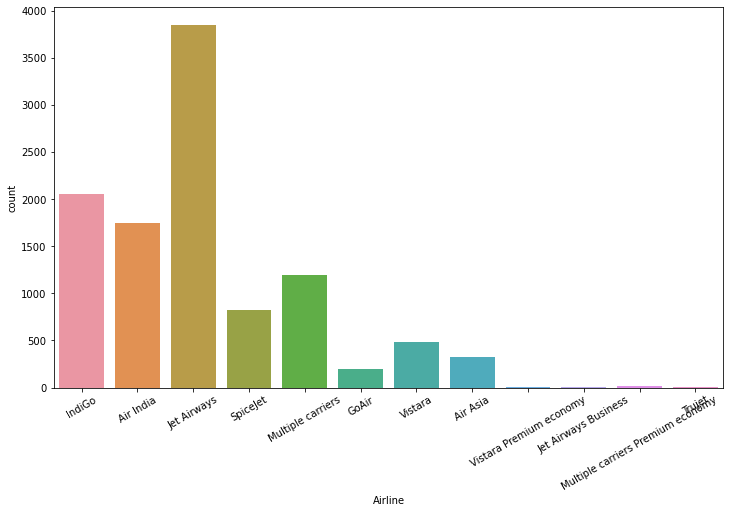

In [38]:
fig, ax = plt. subplots(figsize = (12, 7))
sns.countplot(train_df['Airline'])
plt.xticks(rotation=30)

In [39]:
train_df['Source'].value_counts()

Delhi       4536
Kolkata     2871
Banglore    2197
Mumbai       697
Chennai      381
Name: Source, dtype: int64

<AxesSubplot:xlabel='Source', ylabel='count'>

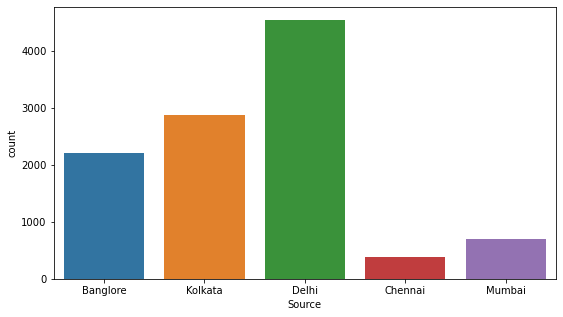

In [40]:
fig, ax = plt. subplots(figsize = (9, 5))
sns.countplot(train_df['Source'])

In [41]:
train_df['Destination'].value_counts()

Cochin       4536
Banglore     2871
Delhi        1265
New Delhi     932
Hyderabad     697
Kolkata       381
Name: Destination, dtype: int64

<AxesSubplot:xlabel='Destination', ylabel='count'>

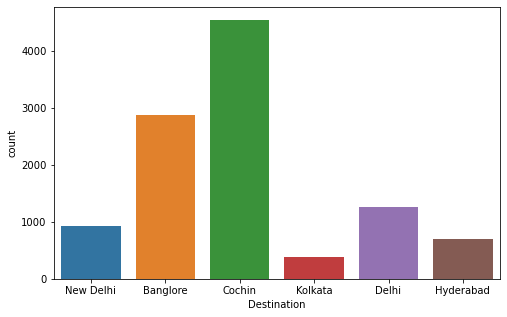

In [42]:
fig, ax = plt. subplots(figsize = (8, 5))
sns.countplot(train_df['Destination'])

In [43]:
train_df['Total_Stops'].value_counts()

1    5625
0    3491
2    1520
3      45
4       1
Name: Total_Stops, dtype: int64

<AxesSubplot:xlabel='Total_Stops', ylabel='count'>

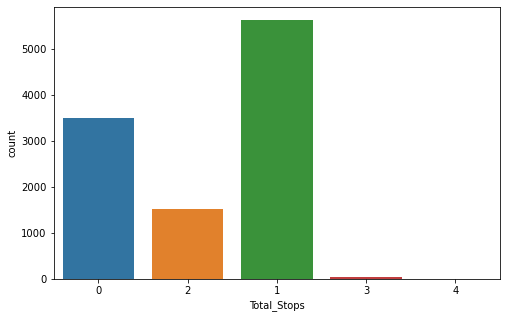

In [44]:
fig, ax = plt. subplots(figsize = (8, 5))
sns.countplot(train_df['Total_Stops'])

In [45]:
train_df['Journey_month'].value_counts()

5    3465
6    3414
3    2724
4    1079
Name: Journey_month, dtype: int64

<AxesSubplot:xlabel='Journey_month', ylabel='count'>

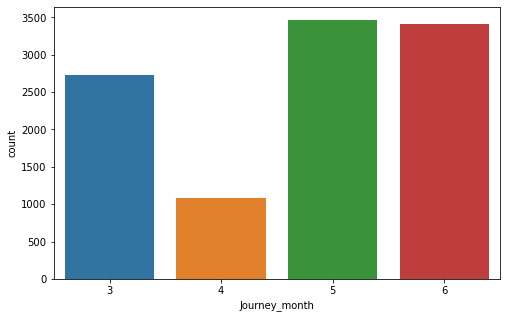

In [46]:
fig, ax = plt. subplots(figsize = (8, 5))
sns.countplot(train_df['Journey_month'])

In [47]:
train_df['Journey_weekday'].value_counts()

2    2079
0    1849
3    1832
5    1670
6    1474
4     909
1     869
Name: Journey_weekday, dtype: int64

<AxesSubplot:xlabel='Journey_weekday', ylabel='count'>

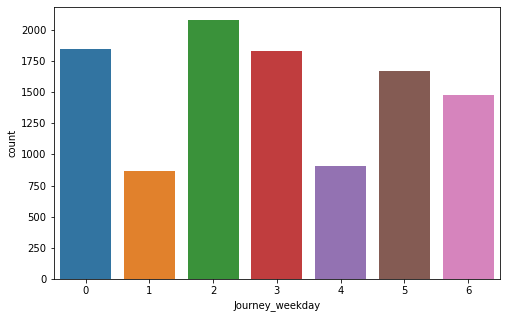

In [48]:
fig,ax = plt. subplots(figsize = (8, 5))
sns.countplot(train_df['Journey_weekday'])

# Encoding

### In Encoding we have two types of encodig Techniques. They are:  
### 1)One-hot encoding
       One-hot encoding is used when we have nomial data.
### 2)Label encoding  
        Label encoding is used for ordinal data.
#### Here we are using Label encoding.

In [49]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [50]:
for i in train_df.columns:
    if train_df[i].dtypes=='object':
        train_df[i]=le.fit_transform(train_df[i])

### Checking for Skewness

In [51]:
train_df.skew()

Airline              0.731057
Source              -0.424023
Destination          1.244046
Total_Stops          0.317109
Price                1.812405
Journey_day          0.118174
Journey_month       -0.387409
Journey_weekday      0.040404
Departure_hour       0.112924
Departure_minutes    0.167234
Arrival_hour        -0.370146
Arrival_minutes      0.110945
Duration_hour        0.762728
Duration_minutes     0.047331
dtype: float64

### Log transformation to reduce skewness in 'Duration_hour'

In [52]:
train_df.Duration_hour=np.log(train_df.Duration_hour+1)

In [53]:
train_df.Duration_hour.skew()

-0.4979633342946755

In [54]:
train_df

,Airline,Source,Destination,Total_Stops,Price,Journey_day,Journey_month,Journey_weekday,Departure_hour,Departure_minutes,Arrival_hour,Arrival_minutes,Duration_hour,Duration_minutes
0,3,0,5,0,3897,24,3,6,22,20,1,10,2.564949,10
1,1,3,0,2,7662,1,5,2,5,50,13,15,3.737670,4
2,4,2,1,2,13882,9,6,6,9,25,4,25,2.484907,0
3,3,3,0,1,6218,12,5,6,18,5,23,30,3.688879,4
4,3,0,5,1,13302,1,3,4,16,50,21,35,3.555348,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,0,3,0,0,4107,9,4,1,19,55,22,25,2.564949,5
10679,1,3,0,0,4145,27,4,5,20,45,23,20,2.564949,6
10680,4,0,2,0,7229,27,4,5,8,20,11,20,3.178054,0
10681,10,0,5,0,12648,1,3,4,11,30,14,10,2.564949,7


# Test Data

### Now we need to Preprocess test data also.

In [55]:
test_df

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info
...,...,...,...,...,...,...,...,...,...,...
2666,Air India,6/06/2019,Kolkata,Banglore,CCU → DEL → BLR,20:30,20:25 07 Jun,23h 55m,1 stop,No info
2667,IndiGo,27/03/2019,Kolkata,Banglore,CCU → BLR,14:20,16:55,2h 35m,non-stop,No info
2668,Jet Airways,6/03/2019,Delhi,Cochin,DEL → BOM → COK,21:50,04:25 07 Mar,6h 35m,1 stop,No info
2669,Air India,6/03/2019,Delhi,Cochin,DEL → BOM → COK,04:00,19:15,15h 15m,1 stop,No info


In [56]:
test_df.drop('Route',axis=1,inplace=True)
test_df.drop('Additional_Info',axis=1,inplace=True)

#Year,month,date and day should be extracted seperately from Date_of_journey.
test_df['Journey_day']=pd.to_datetime(test_df.Date_of_Journey,format="%d/%m/%Y").dt.day
test_df['Journey_month']=pd.to_datetime(test_df.Date_of_Journey,format="%d/%m/%Y").dt.month
test_df['Journey_year']=pd.to_datetime(test_df.Date_of_Journey,format="%d/%m/%Y").dt.year
test_df['Journey_weekday']=pd.to_datetime(test_df.Date_of_Journey,format="%d/%m/%Y").dt.weekday


#As we have extracted date and day ,Now we can drop the column Date_of_Journey.
test_df.drop('Date_of_Journey',axis=1,inplace=True)

#Now we need to extract time from Dep_Time and Arrival_Time.

#Departure Time
test_df['Departure_hour']=pd.to_datetime(test_df.Dep_Time).dt.hour
test_df['Departure_minutes']=pd.to_datetime(test_df.Dep_Time).dt.minute

#Arrival Time
test_df['Arrival_hour']=pd.to_datetime(test_df.Arrival_Time).dt.hour
test_df['Arrival_minutes']=pd.to_datetime(test_df.Arrival_Time).dt.minute


#Now we can drop departure time and arrival time as we already extracted them.
test_df.drop(['Dep_Time','Arrival_Time'],axis=1,inplace=True)


test_df['Total_Stops']=test_df['Total_Stops'].replace({'non-stop':'0','1 stop':'1','2 stops':'2','3 stops':'3','4 stops':'4'})

duration=list(test_df['Duration'])
duration_hour=[]
duration_min=[]
for i in range(len(duration)):
    if len((duration[i].split(' ')))!=2:
        if 'h' in duration[i]:
            duration[i]=duration[i]+' '+'0m'
        else:
            duration[i]='0h'+' '+duration[i]
            
            
            
for i in range(len(duration)):
    duration_hour.append(duration[i].split('h')[0]) 
    duration_min.append(duration[i].split(' ')[1].split('m')[0])
    

    
test_df['Duration_hour']=duration_hour
test_df['Duration_minutes']=duration_min


test_df.drop('Duration',axis=1,inplace=True)

test_df['Journey_year'].value_counts()
#As we can see the whole data is from 2019 . So this column  is useless. we can drop this column.
test_df.drop('Journey_year',axis=1,inplace=True)

#### ENCODING TEST DATA
for i in test_df.columns:
    if test_df[i].dtypes=='object':
        test_df[i]=le.fit_transform(test_df[i])



#As we have included encoded columns,Now we can remove original columns.
test_df.drop(['Airline','Source','Destination'],axis=1,inplace=True)

In [57]:
# Here we can see that Airline_Trujet is not present in test data . So we are adding another column in test data.
test_df['Airline_Trujet']=0
#Now train data and test data has equal number of columns.

In [58]:
test_df

,Total_Stops,Journey_day,Journey_month,Journey_weekday,Departure_hour,Departure_minutes,Arrival_hour,Arrival_minutes,Duration_hour,Duration_minutes,Airline_Trujet
0,1,6,6,3,17,30,4,25,2,11,0
1,1,12,5,6,6,20,10,20,34,0,0
2,1,21,5,1,19,15,19,0,16,8,0
3,1,21,5,1,8,0,21,0,5,0,0
4,0,24,6,0,23,55,2,45,12,10,0
...,...,...,...,...,...,...,...,...,...,...,...
2666,1,6,6,3,20,30,20,25,16,11,0
2667,0,27,3,2,14,20,16,55,12,6,0
2668,1,6,3,2,21,50,4,25,37,6,0
2669,1,6,3,2,4,0,19,15,7,2,0


# Model Building

In [59]:
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error

In [60]:
X=train_df.drop('Price',axis=1)
Y=train_df['Price']

In [61]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=.2,random_state=42)

### Decision Tree Regressor

In [62]:
from sklearn.tree import DecisionTreeRegressor
dt=DecisionTreeRegressor()
dt.fit(X_train,Y_train)

DecisionTreeRegressor()

In [63]:
y_pred_dt=dt.predict(X_test)

In [64]:
# Accuracy to training sets
dt.score(X_train,Y_train)

0.9692484150527355

In [65]:
# accuracy of Testing sets
dt.score(X_test,Y_test)

0.761939488511318

In [66]:
print('r2_score:{}'.format(r2_score(Y_test,y_pred_dt)))
print('-'*75)
print('mean_squared_error:{}'.format(mean_squared_error(Y_test,y_pred_dt)))
print('-'*75)
print('root_mean_squared_error:{}'.format(np.sqrt(mean_squared_error(Y_test,y_pred_dt))))

r2_score:0.761939488511318
---------------------------------------------------------------------------
mean_squared_error:5133074.157277727
---------------------------------------------------------------------------
root_mean_squared_error:2265.628865740752


### Random Forest Regressor

In [67]:
from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor()
rf.fit(X_train,Y_train)

RandomForestRegressor()

In [68]:
y_pred_rf=rf.predict(X_test)

In [69]:
# Accuracy to training sets
rf.score(X_train,Y_train)

0.9527886859962804

In [70]:
# accuracy of Testing sets
rf.score(X_test,Y_test)

0.8383141389485171

In [71]:
print('r2_score:{}'.format(r2_score(Y_test,y_pred_rf)))
print('-'*75)
print('mean_squared_error:{}'.format(mean_squared_error(Y_test,y_pred_rf)))
print('-'*75)
print('root_mean_squared_error:{}'.format(np.sqrt(mean_squared_error(Y_test,y_pred_rf))))

r2_score:0.8383141389485171
---------------------------------------------------------------------------
mean_squared_error:3486279.6428126683
---------------------------------------------------------------------------
root_mean_squared_error:1867.1581729496481


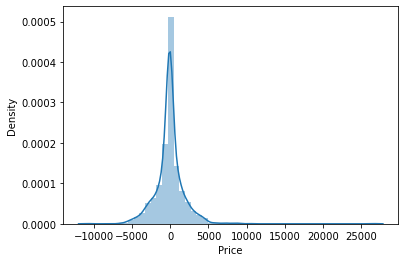

In [72]:
sns.distplot(Y_test-y_pred_rf)
plt.show()

Above graph shows that our residuals are normally distributed .So our predictions are good.

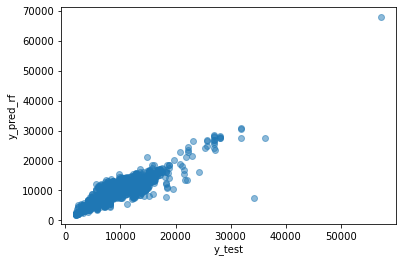

In [73]:
plt.scatter(Y_test,y_pred_rf,alpha=0.5)
plt.xlabel("y_test")
plt.ylabel("y_pred_rf")
plt.show()

linear distribution of y_test and y_pred says that our predictions are good.

### Gradient Boosting Regressor

In [74]:
from sklearn.ensemble import GradientBoostingRegressor
gb=GradientBoostingRegressor()
gb.fit(X_train,Y_train)

GradientBoostingRegressor()

In [75]:
y_pred_gb=gb.predict(X_test)

In [76]:
# Accuracy to training sets
gb.score(X_train,Y_train)

0.7888725628331277

In [77]:
# accuracy of Testing sets
gb.score(X_test,Y_test)

0.7918803202401485

In [78]:
print('r2_score:{}'.format(r2_score(Y_test,y_pred_gb)))
print('-'*75)
print('mean_squared_error:{}'.format(mean_squared_error(Y_test,y_pred_gb)))
print('-'*75)
print('root_mean_squared_error:{}'.format(np.sqrt(mean_squared_error(Y_test,y_pred_gb))))

r2_score:0.7918803202401485
---------------------------------------------------------------------------
mean_squared_error:4487488.257148432
---------------------------------------------------------------------------
root_mean_squared_error:2118.3692447607973


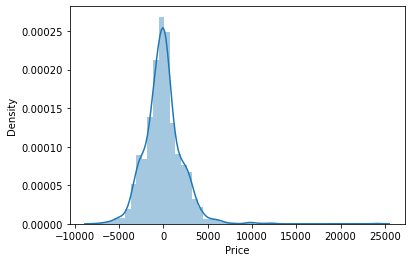

In [79]:
sns.distplot(Y_test-y_pred_gb)
plt.show()

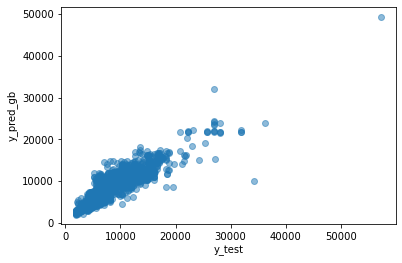

In [80]:
plt.scatter(Y_test,y_pred_gb,alpha=0.5)
plt.xlabel("y_test")
plt.ylabel("y_pred_gb")
plt.show()

In [81]:
def metrics(model,pred):
    print("------------------------------------------------------------------------")
    print(model,"r2_score :",r2_score(Y_test,pred))
    print(model,"mae :",mean_absolute_error(Y_test,pred))
    print(model,"mse :",mean_squared_error(Y_test,pred))
    print(model,"rmse :",np.sqrt(mean_squared_error(Y_test,pred)))

In [82]:
metrics(dt,y_pred_dt)

metrics(rf,y_pred_rf)

metrics(gb,y_pred_gb)



------------------------------------------------------------------------
DecisionTreeRegressor() r2_score : 0.761939488511318
DecisionTreeRegressor() mae : 1318.3786850725317
DecisionTreeRegressor() mse : 5133074.157277727
DecisionTreeRegressor() rmse : 2265.628865740752
------------------------------------------------------------------------
RandomForestRegressor() r2_score : 0.8383141389485171
RandomForestRegressor() mae : 1164.277516926699
RandomForestRegressor() mse : 3486279.6428126683
RandomForestRegressor() rmse : 1867.1581729496481
------------------------------------------------------------------------
GradientBoostingRegressor() r2_score : 0.7918803202401485
GradientBoostingRegressor() mae : 1514.1543594037512
GradientBoostingRegressor() mse : 4487488.257148432
GradientBoostingRegressor() rmse : 2118.3692447607973


### From the above ,we can clearly see that *Random forest Regressor* is performing very good on our data.

### Saving the model

In [85]:
with open('Flightfare_predict.pkl','wb') as f:
    pickle.dump(rf,f)